In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/PRAK PENGOLAHAN CITRA/

/content/drive/MyDrive/PRAK PENGOLAHAN CITRA


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

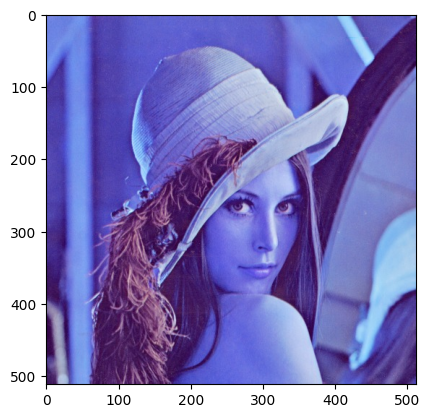

In [ ]:
image = cv2.imread('Lenna.jpg')
plt.imshow(image)

Text(0.5, 1.0, 'Citra RGB')

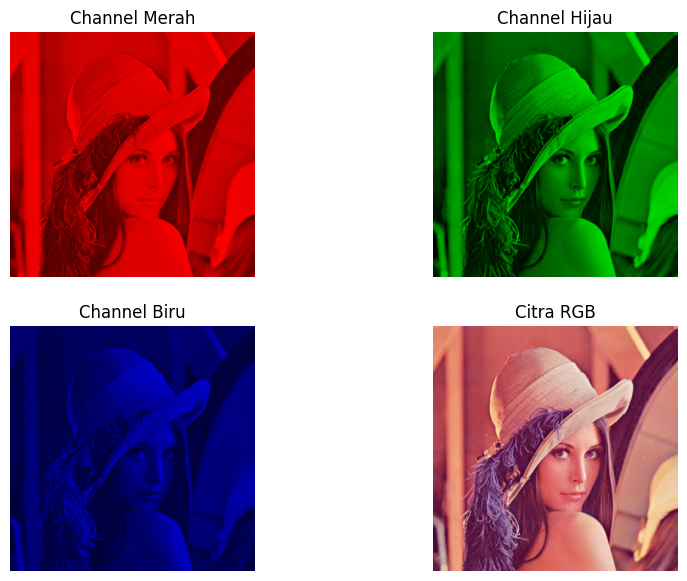

In [ ]:
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
x,y,z = np.shape(rgb_img)
red = np.zeros((x,y,z),dtype=np.uint8)
green =np.zeros((x,y,z),dtype=np.uint8)
blue =np.zeros((x,y,z),dtype=np.uint8)
for i in range(0,x):
  for j in range(0,y):
    red[i][j][0] = rgb_img[i][j][0]
    green[i][j][1] = rgb_img[i][j][1]
    blue[i][j][2] = rgb_img[i][j][2]

fig.add_subplot(rows, columns, 1)
plt.imshow(red)
plt.axis('off')
plt.title('Channel Merah')

fig.add_subplot(rows, columns, 2)
plt.imshow(green)
plt.axis('off')
plt.title('Channel Hijau')

fig.add_subplot(rows, columns, 3)
plt.imshow(blue)
plt.axis('off')
plt.title('Channel Biru')

fig.add_subplot(rows, columns, 4)
plt.imshow(rgb_img)
plt.axis('off')
plt.title('Citra RGB')

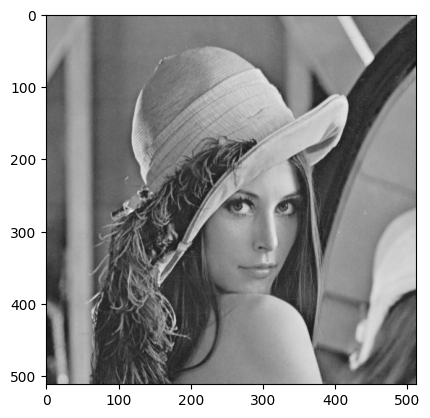

In [ ]:
gray = np.zeros((x,y,z),dtype=np.uint8)
for i in range (0,x):
  for j in range(0,y):
    gray[i][j] = (rgb_img[i][j][0]*0.299) + (green[i][j][1]*0.587) + (blue[i][j][2]*0.114)

plt.imshow(gray)

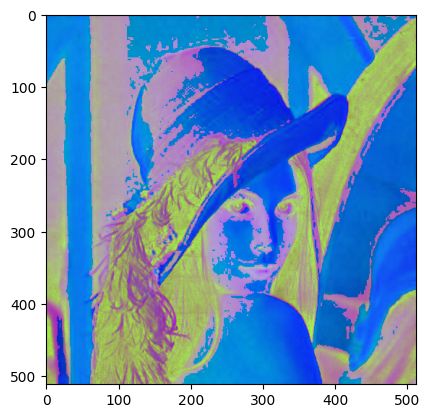

In [ ]:
img_hsv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

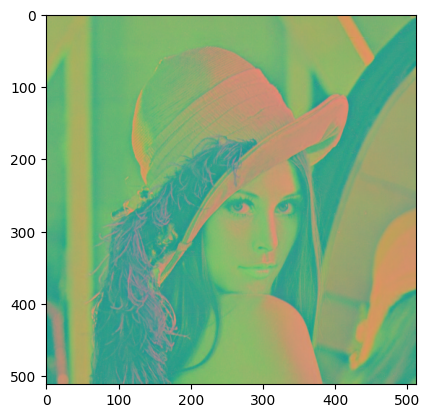

In [ ]:
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
plt.imshow(ycbcr_image)

In [ ]:
def convolve(matrix, kernel):
  row,col = np.shape(matrix)
  output = np.zeros(((row-2),(col-2)),dtype=np.uint8)
  for x in range(row-2):
    for y in range(col-2):
        output[y, x]=(kernel * matrix [y: y+3, x: x+3]).sum()
  return output

In [ ]:
image1 = np.array([[2, 0, 3, 5, 4],
                   [3, 3, 1, 0, 2],
                   [4, 2, 2, 6, 2],
                   [2, 0, 4, 5, 0],
                   [1, 1, 2, 2, 1]])

kernel = np.array([[0, 1, 0],
                   [1, 4, 1],
                   [0, 1, 0]])

convolved_image = convolve(image1, kernel)
convolved_image


array([[18, 12, 14],
       [17, 21, 33],
       [ 9, 25, 32]], dtype=uint8)

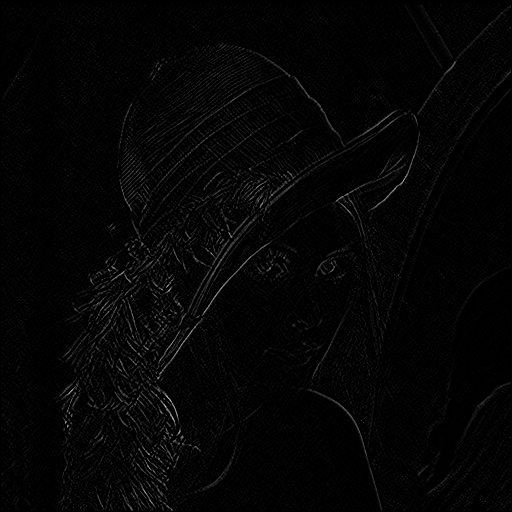

In [ ]:
id_kernel = np.array([[1, 0, -1],
                     [0, 0, 0],
                     [-1, 0, 1]])

lenna_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
flt_img = cv2.filter2D(src=lenna_gray, ddepth=-1, kernel=id_kernel)
cv2_imshow(flt_img)